In [33]:
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
import numpy as np
import os
import deepdish.io as io
from sklearn.metrics import roc_curve, auc
import random

In [3]:
tf.__version__

'1.14.0'

In [4]:
data_Train = io.load(os.path.join('DarkMachineTrain.h5'))
data_Test = io.load(os.path.join('DarkMachineTest.h5'))

In [13]:
X_train = data_Train['X']
y_train = data_Train['y']
X_test = data_Test['X']
y_test = data_Test['y']
X_train = keras.utils.normalize(X_train, axis=1)
X_test = keras.utils.normalize(X_test, axis=1)

In [14]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

('X_train: ', (2420718, 113))
('X_test: ', (806907, 113))
('y_train: ', (2420718, 1))
('y_test: ', (806907, 1))


In [15]:
input_img = keras.models.Input(shape=(113,))
encoded = keras.layers.Dense(128, activation= tf.nn.relu)(input_img)
encoded = keras.layers.Dense(64, activation= tf.nn.relu)(encoded)
encoded = keras.layers.Dense(32, activation= tf.nn.relu)(encoded)
encoded = keras.layers.Dense(16, activation= tf.nn.relu)(encoded) #the latent layer 
decoded = keras.layers.Dense(64, activation= tf.nn.relu)(encoded)
decoded = keras.layers.Dense(128, activation= tf.nn.relu)(decoded)
decoded = keras.layers.Dense(113, activation= tf.nn.sigmoid)(decoded)

encoder = keras.Model(input_img, encoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 2420718 samples, validate on 806907 samples
Epoch 1/10
2420718/2420718 [==============================] - 63s 26us/step - loss: 0.0429 - val_loss: 0.0380
Epoch 2/10
2420718/2420718 [==============================] - 62s 26us/step - loss: 0.0372 - val_loss: 0.0365
Epoch 3/10
2420718/2420718 [==============================] - 62s 26us/step - loss: 0.0361 - val_loss: 0.0358
Epoch 4/10
2420718/2420718 [==============================] - 63s 26us/step - loss: 0.0356 - val_loss: 0.0354
Epoch 5/10
2420718/2420718 [==============================] - 63s 26us/step - loss: 0.0353 - val_loss: 0.0352
Epoch 6/10
2420718/2420718 [==============================] - 63s 26us/step - loss: 0.0350 - val_loss: 0.0348
Epoch 7/10
2420718/2420718 [==============================] - 63s 26us/step - loss: 0.0347 - val_loss: 0.0346
Epoch 8/10
2420718/2420718 [==============================] - 62s 26us/step - loss: 0.0345 - val_loss: 0.0344
Epoch 9/10
2420718/2420718 [==============================] - 63s 2

In [16]:
autoencoder.save('DarkMachine_autoencoder.model')
encoder.save('DarkMachine_encoder.model')

In [17]:
encoder_model = keras.models.load_model('DarkMachine_encoder.model')

/home/debo/env_autoencoder/local/lib/python2.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [21]:
enCoded_X_train = encoder_model.predict([X_train])
enCoded_X_test = encoder_model.predict([X_test])

In [22]:
enCoded_X_train.shape

(2420718, 16)

In [28]:
seqModel = keras.models.Sequential()
seqModel.add(keras.layers.Dense(128, input_dim=16, activation= tf.nn.relu))
seqModel.add(keras.layers.Dense(64, activation= tf.nn.relu))
seqModel.add(keras.layers.Dense(32, activation= tf.nn.relu))
seqModel.add(keras.layers.Dense(16, activation= tf.nn.relu))
seqModel.add(keras.layers.Dense(8, activation= tf.nn.relu))
seqModel.add(keras.layers.Dense(1, activation= tf.nn.sigmoid))
seqModel.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

seqModel.fit(enCoded_X_train, y_train, batch_size=256, epochs=10)


Epoch 1/10
2420718/2420718 [==============================] - 26s 11us/step - loss: 0.1599 - acc: 0.9382
Epoch 2/10
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1321 - acc: 0.9505
Epoch 3/10
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1220 - acc: 0.9549
Epoch 4/10
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1168 - acc: 0.9571
Epoch 5/10
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1135 - acc: 0.9585
Epoch 6/10
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1111 - acc: 0.9595
Epoch 7/10
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1094 - acc: 0.9602
Epoch 8/10
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1079 - acc: 0.9608
Epoch 9/10
2420718/2420718 [==============================] - 25s 10us/step - loss: 0.1068 - acc: 0.9613
Epoch 10/10
2420718/2420718 [==========================

In [29]:
sig_predict = seqModel.predict(enCoded_X_test,batch_size=256, verbose=1)

806907/806907 [==============================] - 3s 4us/step


/home/debo/env_autoencoder/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


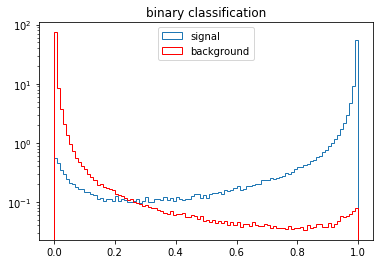

In [30]:
sigSoft= sig_predict[np.where(y_test==1)]
bkgSoft = sig_predict[np.where(y_test==0)]
_=plt.hist(sigSoft,bins=100, histtype='step', label='signal', normed = 1)
                           
_=plt.hist(bkgSoft,bins=100, histtype='step', color= 'red', label='background', normed = 1)

_=plt.yscale('log')

_=plt.legend(loc='upper center')

_=plt.title('binary classification')

/home/debo/env_autoencoder/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.


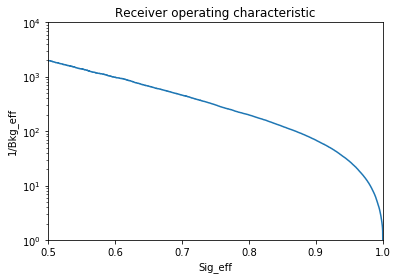

In [45]:
fpr, tpr, thresholds = roc_curve(y_test,sig_predict)
plt.figure()
##plt.plot(fpr, tpr)
plt.plot(tpr, 1/fpr)
plt.xlim([0.5, 1])
plt.ylim([1, 10000])
plt.ylabel('1/Bkg_eff')
plt.xlabel('Sig_eff')
plt.title('Receiver operating characteristic')
plt.yscale('log')
plt.show()